In [0]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [97]:
X_train.shape

(60000, 28, 28)

In [98]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

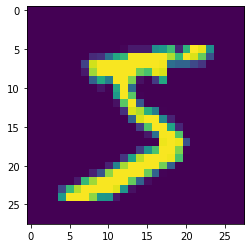

In [99]:
plt.imshow(X_train[0])

In [100]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images
X_train.shape

(60000, 784)

In [101]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [102]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)
#y_test.shape

10


In [0]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [104]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 9s - loss: 0.1979 - accuracy: 0.9398 - val_loss: 0.1103 - val_accuracy: 0.9635
Epoch 2/10
1875/1875 - 9s - loss: 0.0861 - accuracy: 0.9728 - val_loss: 0.0881 - val_accuracy: 0.9717
Epoch 3/10
1875/1875 - 9s - loss: 0.0606 - accuracy: 0.9810 - val_loss: 0.0754 - val_accuracy: 0.9781
Epoch 4/10
1875/1875 - 9s - loss: 0.0468 - accuracy: 0.9855 - val_loss: 0.0823 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 - 9s - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.0824 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 - 9s - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.0807 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 - 9s - loss: 0.0278 - accuracy: 0.9909 - val_loss: 0.0845 - val_accuracy: 0.9785
Epoch 8/10
1875/1875 - 9s - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0696 - val_accuracy: 0.9826
Epoch 9/10
1875/1875 - 9s - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0795 - val_accuracy: 0.9819
Epoch 10/10
1875/1875 - 9s - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0943 - 

In [105]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.9799000024795532% 
 Error: 0.020099997520446777
